In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d

In [62]:
#Functions

def gaussian_result_stack(num_of_predictions, predictions):

    gaussian_result_stack = []

    for i in tqdm(range(num_of_predictions)):
    
        result = predictions[i]
        b = gaussians.get(result)

        gaussian_result_stack.append(b)
    
    print('stacking...')

    return np.stack(gaussian_result_stack, axis=0)

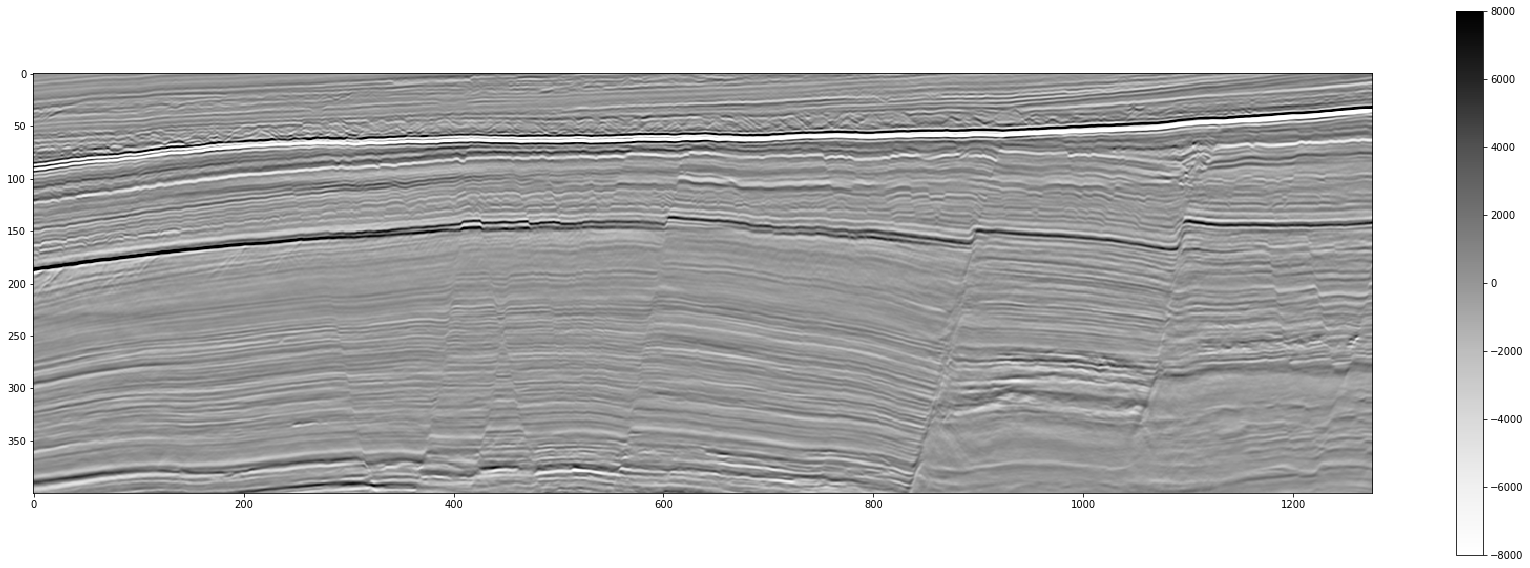

In [76]:
data = np.genfromtxt('CVG_data/CVG_IL1414_fullstack.dat')
data = data.T

data_subset = data[300:700]

del data

plt.figure(figsize=(30,10))
plt.imshow(data_subset, cmap='Greys', vmin=-8000, vmax=8000)
plt.colorbar()

In [77]:
patches = extract_patches_2d(image=data_subset, patch_size=(48,32))

In [78]:
predictions = np.load('CVG_data/results_IL1414_300700.npy')
pred_shape = np.shape(predictions)

In [84]:

grad10 = np.load('gaussians/2sd/grad10.npy')
grad9 = np.load('gaussians/2sd/grad9.npy')
grad8 = np.load('gaussians/2sd/grad8.npy')
grad7 = np.load('gaussians/2sd/grad7.npy') 
grad6 = np.load('gaussians/2sd/grad6.npy') 
grad5 = np.load('gaussians/2sd/grad5.npy') 
grad4 = np.load('gaussians/2sd/grad4.npy') 
grad3 = np.load('gaussians/2sd/grad3.npy') 
grad2 = np.load('gaussians/2sd/grad2.npy') 
grad1 = np.load('gaussians/2sd/grad1.npy') 

neggrad10 = np.load('gaussians/2sd/neggrad10.npy') 
neggrad9 = np.load('gaussians/2sd/neggrad9.npy') 
neggrad8 = np.load('gaussians/2sd/neggrad8.npy') 
neggrad7 = np.load('gaussians/2sd/neggrad7.npy') 
neggrad6 = np.load('gaussians/2sd/neggrad6.npy') 
neggrad5 = np.load('gaussians/2sd/neggrad5.npy') 
neggrad4 = np.load('gaussians/2sd/neggrad4.npy') 
neggrad3 = np.load('gaussians/2sd/neggrad3.npy') 
neggrad2 = np.load('gaussians/2sd/neggrad2.npy') 
neggrad1 = np.load('gaussians/2sd/neggrad1.npy')


nofault = np.load('gaussians/2sd/nofault.npy')

#gaussians = pickle.load( open("gaussians/gaussian_dict.p", "rb" ))
gaussians = {0:grad1, 1:grad2, 2:grad3, 3:grad4, 4:grad5,
             5:grad6, 6:grad7, 7:grad8, 8:grad9, 9:grad10,
             10:neggrad1, 11:neggrad2, 12:neggrad3, 13:neggrad4, 14:neggrad5,
             15:neggrad6, 16:neggrad7, 17:neggrad8, 18:neggrad9, 19:neggrad10,
             20:nofault}

In [85]:
gaussians[0] = nofault
gaussians[1] = nofault
#gaussians[2] = nofault
gaussians[9] = nofault

gaussians[10] = nofault
gaussians[11] = nofault
#gaussians[12] = nofault
gaussians[19] = nofault

In [86]:
result = gaussian_result_stack(int(pred_shape[0]), predictions)
print(str(result.shape))

100%|██████████| 439485/439485 [00:00<00:00, 1710323.54it/s]


stacking...
(439485, 48, 32)


In [87]:
teststack = reconstruct_from_patches_2d(result, data_subset.shape)
teststack[teststack<0.002] = np.nan

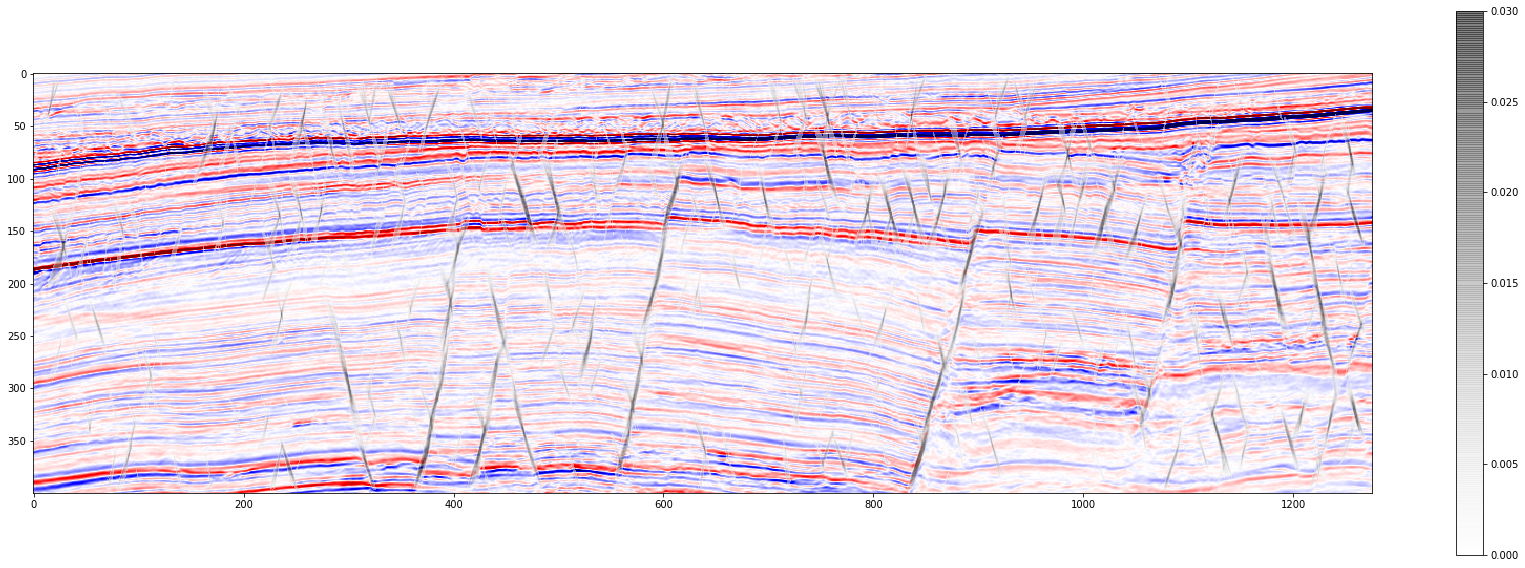

In [88]:
plt.figure(figsize=(30,10))
plt.imshow(data_subset, cmap='seismic', vmin=-10000, vmax=10000)
plt.imshow(teststack,alpha=0.5, cmap='Greys', vmin=-0, vmax=0.03)
plt.colorbar()
